In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [20]:
file = 'Data\\chagas.txt'
df = pd.read_csv(file , delim_whitespace=True, header=None)

C:\Users\yourk\AppData\Local\Temp\ipykernel_15884\2176867782.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file , delim_whitespace=True, header=None)


In [21]:
col_name = ['X', 'Y', 'Z']
df.columns = col_name

X = df[['X','Y']].values

In [22]:
X

array([[ 60., 176.],
       [ 91., 132.],
       [ 58., 189.],
       [ 95., 154.],
       [ 53., 171.],
       [ 79., 141.],
       [ 51., 191.],
       [120., 157.],
       [ 43., 171.],
       [118., 154.],
       [ 53., 180.],
       [ 56., 153.],
       [ 44., 185.],
       [ 93., 142.],
       [ 40., 191.],
       [135., 175.],
       [ 42., 173.],
       [128., 162.],
       [ 45., 187.],
       [ 94., 160.],
       [ 50., 171.],
       [120., 173.],
       [ 43., 199.],
       [108., 143.],
       [ 61., 195.],
       [ 96., 123.],
       [ 56., 186.],
       [139., 174.],
       [ 62., 182.],
       [ 84., 129.],
       [ 59., 176.],
       [ 94., 168.],
       [ 36., 174.],
       [106., 146.],
       [ 39., 175.],
       [100., 153.],
       [ 38., 171.],
       [ 98., 134.],
       [ 62., 177.],
       [112., 142.],
       [ 37., 189.],
       [ 83., 152.],
       [ 55., 178.],
       [ 81., 161.],
       [ 48., 173.],
       [140., 174.],
       [ 31., 161.],
       [109.,

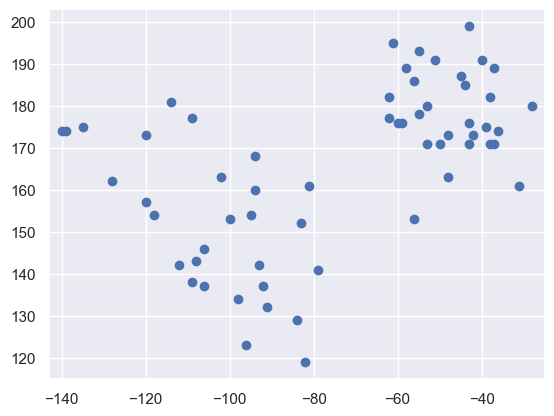

In [23]:
X[:, 0] = - X[:, 0]
plt.scatter(X[:, 0], X[:, 1]);
plt.axis('equal');

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

[[ 0.92960635  0.36855397]
 [-0.36855397  0.92960635]]
[1129.55723131  261.97355965]
[0.81173714 0.18826286]


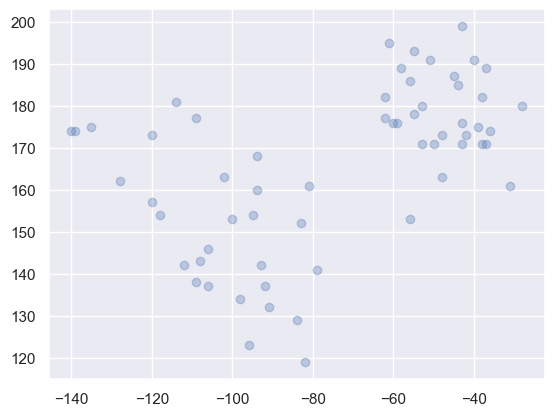

In [25]:
 
print(pca.components_)
 
print(pca.explained_variance_)
 
print(pca.explained_variance_ratio_)
 
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
 

In [26]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

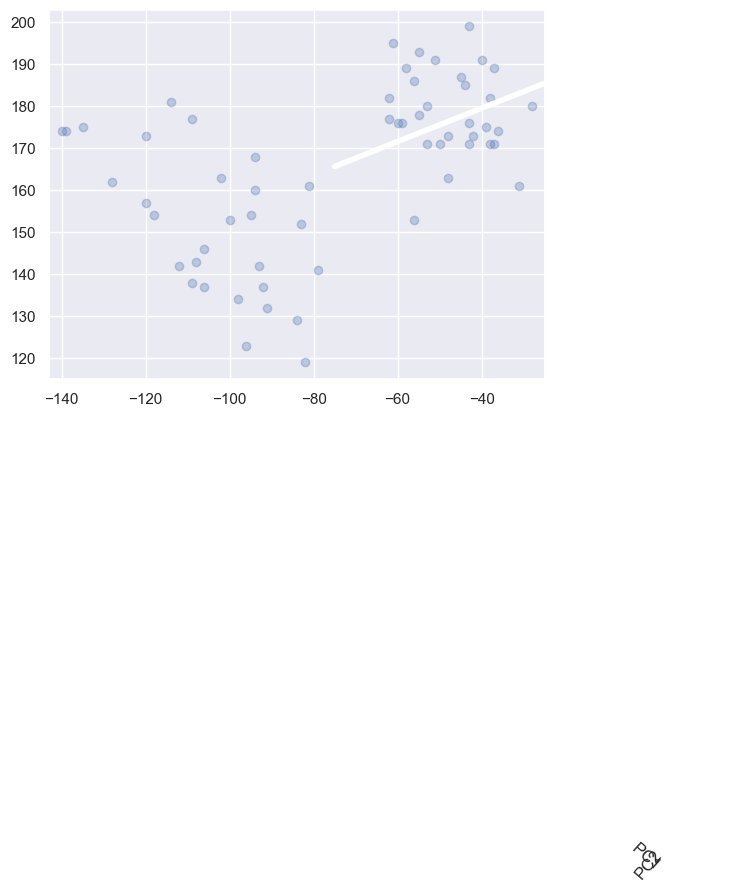

In [27]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for k, v in zip(pca.explained_variance_, pca.components_):
    vec = v * 3 * np.sqrt(k)
 
    ax = plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=4,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops=arrowprops)
    ax.text(-0.90, 1.2,'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(-0.1,-0.6,'PC2', ha='center', va='center', rotation=50, size=12)
plt.axis('equal');

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs # import make_blobs directly from sklearn.datasets

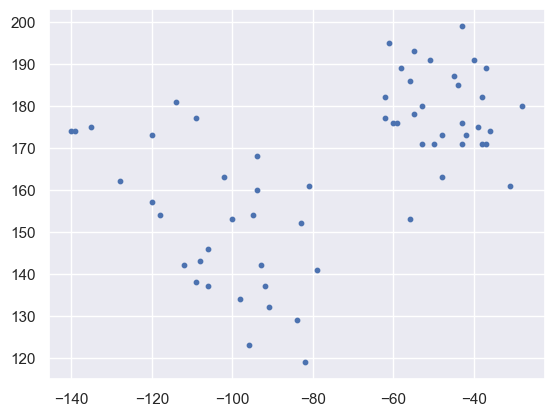

In [29]:
plt.scatter(X[:, 0], X[:, 1], s=10);

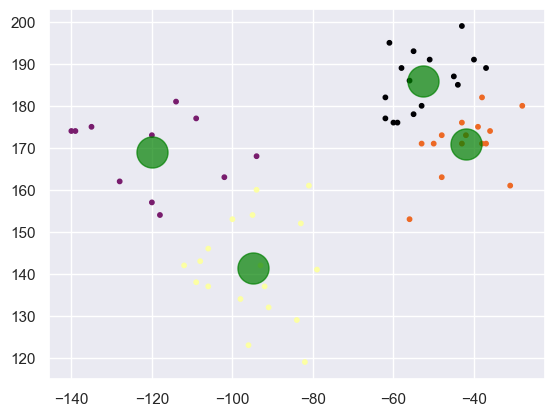

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='inferno')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7);

C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


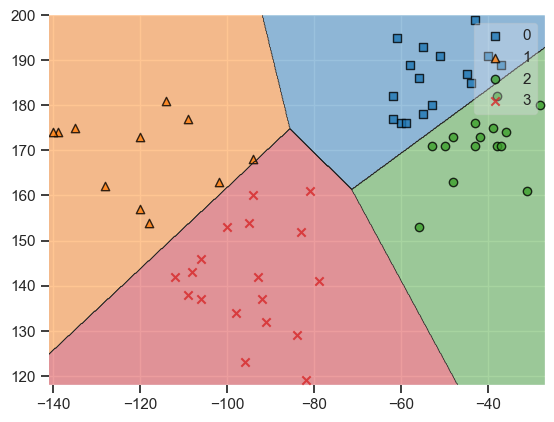

In [35]:
from mlxtend.plotting import plot_decision_regions
y = kmeans.labels_.astype(np.int_)  # Convert labels to integers

# Plot decision regions
plot_decision_regions(X, y, clf=kmeans)
plt.show()

In [8]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

In [9]:
data, labels = load_wine(return_X_y=True)

In [10]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
 

In [11]:
print(data.shape)
print(reduced_data.shape)

(178, 13)
(178, 2)


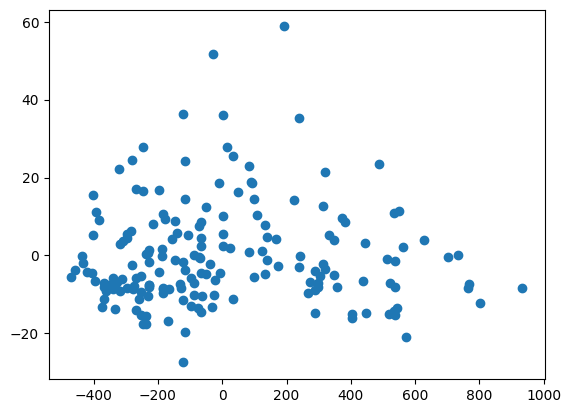

In [12]:
import numpy as np
from matplotlib import pyplot as plt
a, b = reduced_data.T
plt.scatter(a,b)
plt.show()

(178, 2)


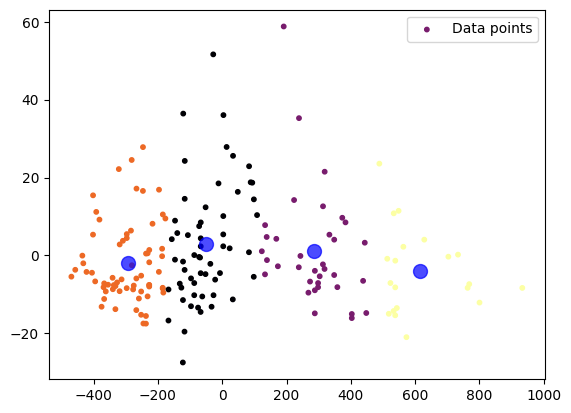

In [17]:
from sklearn.cluster import KMeans
# Combine `a` and `b` into a 2D array with two features
X = np.column_stack((a, b))

# Verify that X has two dimensions (two features)
print(X.shape)  # This should output something like (num_samples, 2)

# Initialize and fit the KMeans model on the 2D data
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Predict clusters
y_kmeans = kmeans.predict(X)

# Extract the cluster centers, which should have two columns now
centers = kmeans.cluster_centers_

# Plot the clustered data points with colors based on the cluster labels
plt.scatter(a, b, c=y_kmeans, s=10, cmap='inferno', label='Data points')

# Plot the cluster centers with larger markers
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.7)

# Add a legend and show the plot
plt.legend()
plt.show()



In [18]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [20]:
data, labels = load_iris(return_X_y=True)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print(data.shape)
print(reduced_data.shape)

(150, 4)
(150, 2)


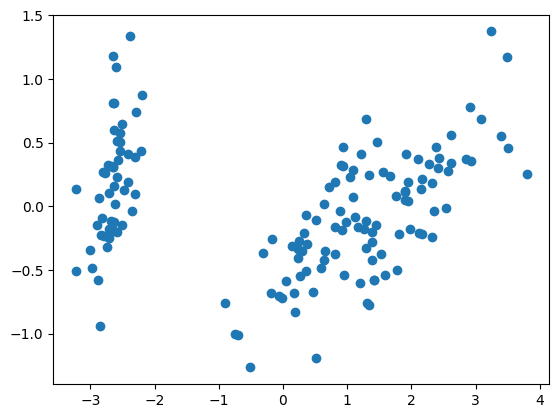

In [22]:
import numpy as np
from matplotlib import pyplot as plt
a, b = reduced_data.T
plt.scatter(a,b)
plt.show()

(150, 2)


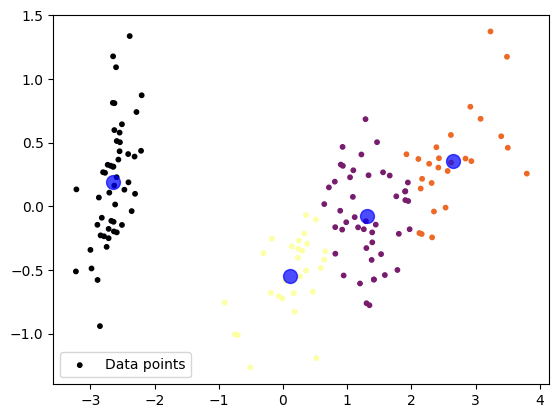

In [ ]:
from sklearn.cluster import KMeans
X = np.column_stack((a, b))

print(X.shape)  
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.scatter(a, b, c=y_kmeans, s=10, cmap='inferno', label='Data points')
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.7)

plt.legend()
plt.show()


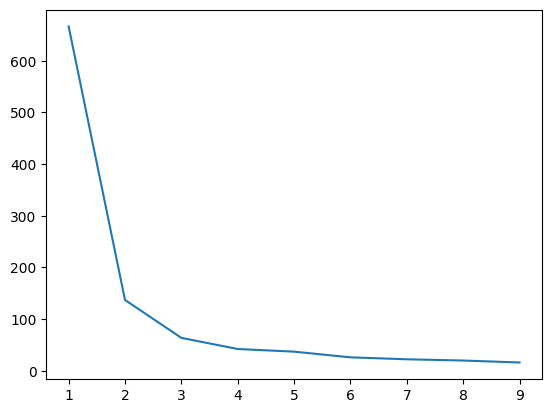

In [29]:
import pandas as pd
kmeans.inertia_
sse_ = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

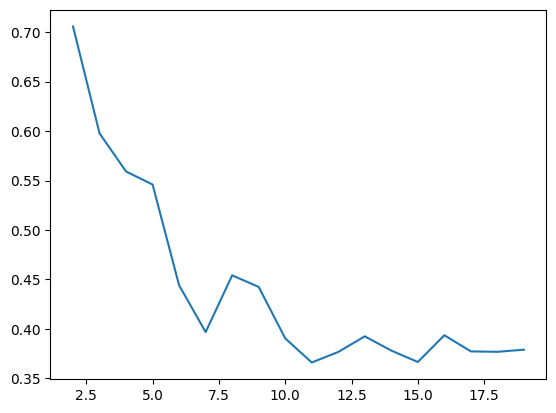

In [30]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);